In [5]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import re

In [4]:
# load data
tmean = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/tmean_prism_pennsylvania_data.csv')
ppt = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/ppt_prism_pennsylvania_data.csv')
forage = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/foraging_quality_pennsylvania_data.csv')

In [73]:
tmean = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/tmean_prism_pennsylvania_data_1990_2023.csv')
ppt = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/ppt_prism_pennsylvania_data_1990_2023.csv')
forage = pd.read_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/foraging_quality_pennsylvania_data.csv')

In [74]:

cols = forage.columns.tolist()

# create new columns 
new_cols = []
for col in cols:
    if "Forage" in col:
        code = col.split("_")[1]
        number = re.findall(r'\d+', code)[0]
        new_cols.append(number)
    else:
        new_cols.append(col)

new_cols

# rename columns
forage = forage.rename(columns=dict(zip(forage.columns, new_cols)))

# create grid_id column
forage["grid_id"] = forage["col"].astype(str) + "_" + forage["row"].astype(str)

possible_cols = forage.col.tolist()
possible_rows = forage.row.tolist()

def get_adjacent_cols_rows(col, row, possible_cols=possible_cols, possible_rows=possible_rows):
    adjacent_cols_rows = []
    
    for c, r in zip(possible_cols, possible_rows):
        if abs(c - col) <= 1 and abs(r - row) <= 1 and (c != col or r != row):
            adjacent_cols_rows.append((c, r))
    
    return adjacent_cols_rows



def getGridQuality(col, row, year, forage=forage):
    grid_id = str(col) + "_" + str(row)
    grid_quality = forage[forage["grid_id"] == grid_id][str(year)].values[0]
    return grid_quality


def getGridForageQuality(col, row, year):
    '''
    Get forage quality for a given grid cell
    col: int, column number
    row: int, row number
    year: int, year
    
    output:
    float [0,233]
    '''
    grid_quality = getGridQuality(col, row, year)
    if math.isnan(grid_quality):
        adjacent_cols_rows = get_adjacent_cols_rows(col, row)
        adjacent_quality = []
        for c, r in adjacent_cols_rows:
            grid_quality = getGridQuality(c, r, year)
            if not math.isnan(grid_quality):
                adjacent_quality.append(grid_quality)
        return np.mean(adjacent_quality)
    else:
        return grid_quality




################# tmean data #################

cols = tmean.columns.tolist()

new_cols = []
for col in cols:
    if "PRISM_tmean" in col:
        new_cols.append(col.split("_")[-2])
    else:
        new_cols.append(col)
new_cols

tmean = tmean.rename(columns=dict(zip(tmean.columns, new_cols)))


tmean["grid_id"] = tmean["col"].astype(str) + "_" + tmean["row"].astype(str)

def getTmean(col, row, day, month, year, tmean=tmean):
    '''
    Get temperature data for a given grid cell
    col: int, column number
    row: int, row number
    day: int, day of the month
    month: int, month of the year
    year: int, year
    tmean: pd.DataFrame, temperature data

    output:
    float, temperature in degrees celcius
    '''
    if month < 10:
        month = "0" + str(month)
    if day < 10:
        day = "0" + str(day)
    date = str(year) + "" + str(month) + "" + str(day)
    grid_id = str(col) + "_" + str(row)
    tmean = tmean[tmean["grid_id"] == grid_id][date].values[0]
    return tmean

############### ppt data #################

cols = ppt.columns.tolist()

new_cols = []
for col in cols:
    if "PRISM_ppt" in col:
        new_cols.append(col.split("_")[-2])
    else:
        new_cols.append(col)

ppt = ppt.rename(columns=dict(zip(ppt.columns, new_cols)))

ppt["grid_id"] = ppt["col"].astype(str) + "_" + ppt["row"].astype(str)

def getPpt(col, row, day, month, year, ppt=ppt):
    '''
    Get precipitation data for a given grid cell
    col: int, column number
    row: int, row number
    day: int, day of the month
    month: int, month of the year
    year: int, year
    ppt: pd.DataFrame, precipitation data

    output:
    float, precipitation in mm
    '''
    if month < 10:
        month = "0" + str(month)
    if day < 10:
        day = "0" + str(day)
    date = str(year) + "" + str(month) + "" + str(day)
    grid_id = str(col) + "_" + str(row)
    ppt = ppt[ppt["grid_id"] == grid_id][date].values[0]
    return ppt

In [75]:
# Analysis

In [88]:
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [89]:
tmean.head()

,Unnamed: 0,col,row,lon,lat,20240401,20240402,20240403,20240404,20240405,...,20230922,20230923,20230924,20230925,20230926,20230927,20230928,20230929,20230930,grid_id
0,1,1083,184,-79.875000,42.250000,5.9265,5.4837,8.5025,3.6137,3.8873,...,15.345699,16.580900,15.183300,15.098599,16.1915,16.329500,14.403500,15.727400,15.281899,1083_184
1,2,1084,184,-79.833333,42.250000,6.0300,5.7104,8.5476,3.8709,4.0960,...,15.432199,16.624500,15.239500,15.162900,16.2728,16.381599,14.515800,15.770100,15.351999,1084_184
2,3,1085,184,-79.791667,42.250000,6.0538,6.0169,8.7476,4.0802,4.2606,...,15.810699,16.782400,15.483399,15.337500,16.5418,16.457500,14.842700,15.824100,15.631700,1085_184
3,4,1086,184,-79.750000,42.250000,6.0455,6.3161,8.8920,4.3004,4.2719,...,16.052999,16.761200,15.656099,15.408899,16.6777,16.367399,15.032499,15.711800,15.793300,1086_184
4,5,1081,185,-79.958333,42.208333,5.6563,5.8635,8.7472,3.6509,3.3070,...,16.079700,16.813099,15.607800,15.309099,16.4730,16.229399,14.773000,15.531099,15.654099,1081_185


In [90]:
data = tmean[['col','row']]

In [91]:
cols = data.col.tolist()
rows = data.row.tolist()

In [92]:
def getPennsylvaniaPpt(day, month, year):
    print(month, year)
    ppt_data = []
    for col, row in zip(cols, rows):
        ppt = getPpt(col, row, day, month, year)
        ppt_data.append(ppt)

    return np.mean(ppt_data)


def getPennsylvaniaTmean(day, month, year):
    print(month, year)
    tmean_data = []
    for col, row in zip(cols, rows):
        tmean = getTmean(col, row, day, month, year)
        tmean_data.append(tmean)

    return np.mean(tmean_data)


In [85]:
import pandas as pd

start_date = '1991-01-01'
end_date = '2023-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='D').strftime('%Y-%m-%d').tolist()

date_range


['1991-01-01',
 '1991-01-02',
 '1991-01-03',
 '1991-01-04',
 '1991-01-05',
 '1991-01-06',
 '1991-01-07',
 '1991-01-08',
 '1991-01-09',
 '1991-01-10',
 '1991-01-11',
 '1991-01-12',
 '1991-01-13',
 '1991-01-14',
 '1991-01-15',
 '1991-01-16',
 '1991-01-17',
 '1991-01-18',
 '1991-01-19',
 '1991-01-20',
 '1991-01-21',
 '1991-01-22',
 '1991-01-23',
 '1991-01-24',
 '1991-01-25',
 '1991-01-26',
 '1991-01-27',
 '1991-01-28',
 '1991-01-29',
 '1991-01-30',
 '1991-01-31',
 '1991-02-01',
 '1991-02-02',
 '1991-02-03',
 '1991-02-04',
 '1991-02-05',
 '1991-02-06',
 '1991-02-07',
 '1991-02-08',
 '1991-02-09',
 '1991-02-10',
 '1991-02-11',
 '1991-02-12',
 '1991-02-13',
 '1991-02-14',
 '1991-02-15',
 '1991-02-16',
 '1991-02-17',
 '1991-02-18',
 '1991-02-19',
 '1991-02-20',
 '1991-02-21',
 '1991-02-22',
 '1991-02-23',
 '1991-02-24',
 '1991-02-25',
 '1991-02-26',
 '1991-02-27',
 '1991-02-28',
 '1991-03-01',
 '1991-03-02',
 '1991-03-03',
 '1991-03-04',
 '1991-03-05',
 '1991-03-06',
 '1991-03-07',
 '1991-03-

In [97]:
# filter for only dates in the months of April, May and June
date_range = [date for date in date_range if date.split("-")[1] in ['04','05','06']]

In [98]:
df = pd.DataFrame(date_range, columns=['date'])

In [99]:
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df['ppt'] = df.apply(lambda x: getPennsylvaniaPpt(x['day'], x['month'], x['year']), axis=1)


4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992

In [100]:
df['tmean'] = df.apply(lambda x: getPennsylvaniaTmean(x['day'], x['month'], x['year']), axis=1)

4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
4 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
5 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
6 1991
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
4 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992
5 1992

In [102]:
df.to_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/output/pennsylvania_weather_data_1991_2023_april_june.csv', index=False)

In [103]:
df.to_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/output/pennsylvania_weather_data_1991_2023_april_june.csv', index=False)

In [104]:
df

,date,day,month,year,ppt,tmean
0,1991-04-01,1,4,1991,0.945306,2.372650
1,1991-04-02,2,4,1991,1.871525,2.431527
2,1991-04-03,3,4,1991,0.003758,0.520477
3,1991-04-04,4,4,1991,0.019328,5.253368
4,1991-04-05,5,4,1991,0.748290,11.626859
...,...,...,...,...,...,...
2998,2023-06-26,26,6,2023,4.794249,22.746887
2999,2023-06-27,27,6,2023,13.917907,21.835140
3000,2023-06-28,28,6,2023,8.703847,19.334802
3001,2023-06-29,29,6,2023,0.107341,17.065268


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2008-11-12'),
  Text(0.0, 0, '2008-01-01'),
  Text(50.0, 0, '2008-02-20'),
  Text(100.0, 0, '2008-04-10'),
  Text(150.0, 0, '2008-05-30'),
  Text(200.0, 0, '2008-07-19'),
  Text(250.0, 0, '2008-09-07'),
  Text(300.0, 0, '2008-10-27'),
  Text(350.0, 0, '2008-12-16'),
  Text(400.0, 0, '')])

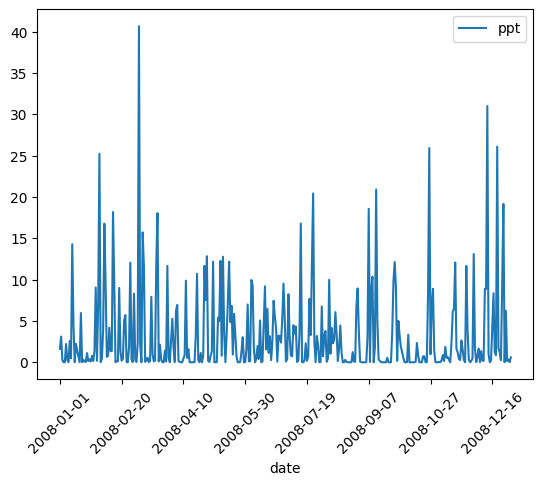

In [25]:
df[df['year'] == 2008].plot(x='date', y='ppt')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2023-11-12'),
  Text(0.0, 0, '2023-01-01'),
  Text(50.0, 0, '2023-02-20'),
  Text(100.0, 0, '2023-04-11'),
  Text(150.0, 0, '2023-05-31'),
  Text(200.0, 0, '2023-07-20'),
  Text(250.0, 0, '2023-09-08'),
  Text(300.0, 0, '2023-10-28'),
  Text(350.0, 0, '2023-12-17'),
  Text(400.0, 0, '')])

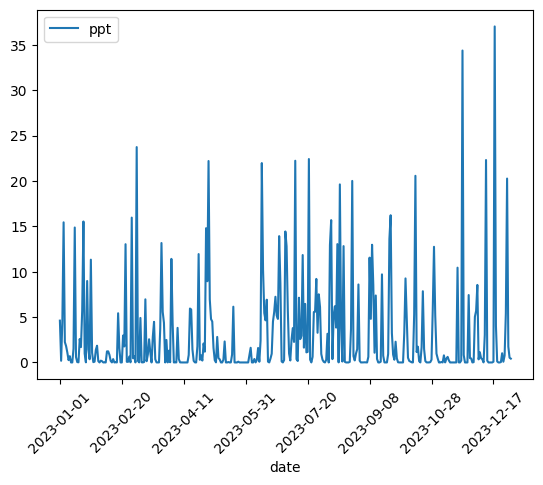

In [26]:
df[df['year'] == 2023].plot(x='date', y='ppt')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2008-11-12'),
  Text(0.0, 0, '2008-01-01'),
  Text(50.0, 0, '2008-02-20'),
  Text(100.0, 0, '2008-04-10'),
  Text(150.0, 0, '2008-05-30'),
  Text(200.0, 0, '2008-07-19'),
  Text(250.0, 0, '2008-09-07'),
  Text(300.0, 0, '2008-10-27'),
  Text(350.0, 0, '2008-12-16'),
  Text(400.0, 0, '')])

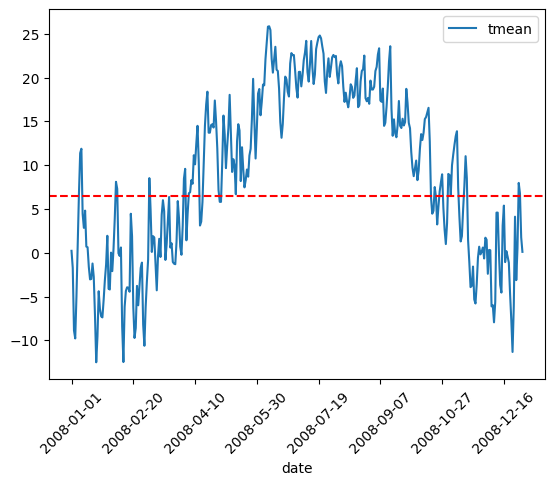

In [61]:
df[df['year'] == 2008].plot(x='date', y='tmean')
plt.axhline(y=6.5, color='red', linestyle='--')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2023-11-12'),
  Text(0.0, 0, '2023-01-01'),
  Text(50.0, 0, '2023-02-20'),
  Text(100.0, 0, '2023-04-11'),
  Text(150.0, 0, '2023-05-31'),
  Text(200.0, 0, '2023-07-20'),
  Text(250.0, 0, '2023-09-08'),
  Text(300.0, 0, '2023-10-28'),
  Text(350.0, 0, '2023-12-17'),
  Text(400.0, 0, '')])

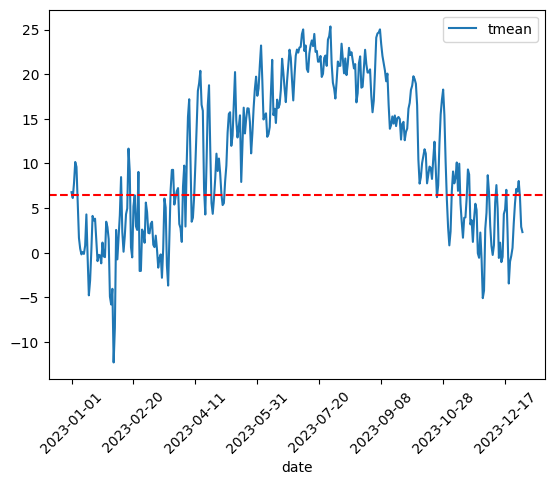

In [62]:
df[df['year'] == 2023].plot(x='date', y='tmean')
plt.axhline(y=6.5, color='red', linestyle='--')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2009-11-12'),
  Text(0.0, 0, '2009-01-01'),
  Text(50.0, 0, '2009-02-20'),
  Text(100.0, 0, '2009-04-11'),
  Text(150.0, 0, '2009-05-31'),
  Text(200.0, 0, '2009-07-20'),
  Text(250.0, 0, '2009-09-08'),
  Text(300.0, 0, '2009-10-28'),
  Text(350.0, 0, '2009-12-17'),
  Text(400.0, 0, '')])

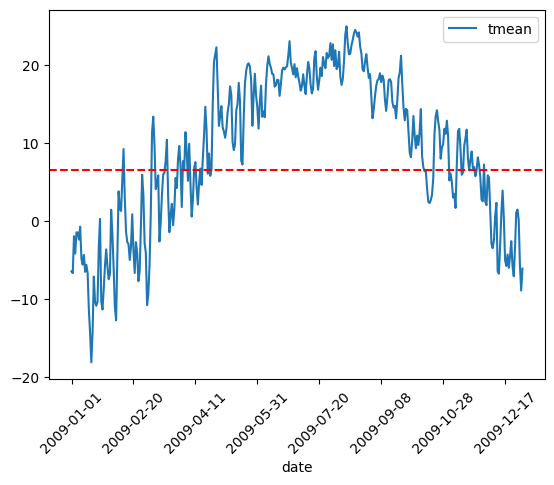

In [64]:
df[df['year'] == 2009].plot(x='date', y='tmean')
plt.axhline(y=6.5, color='red', linestyle='--')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2022-11-12'),
  Text(0.0, 0, '2022-01-01'),
  Text(50.0, 0, '2022-02-20'),
  Text(100.0, 0, '2022-04-11'),
  Text(150.0, 0, '2022-05-31'),
  Text(200.0, 0, '2022-07-20'),
  Text(250.0, 0, '2022-09-08'),
  Text(300.0, 0, '2022-10-28'),
  Text(350.0, 0, '2022-12-17'),
  Text(400.0, 0, '')])

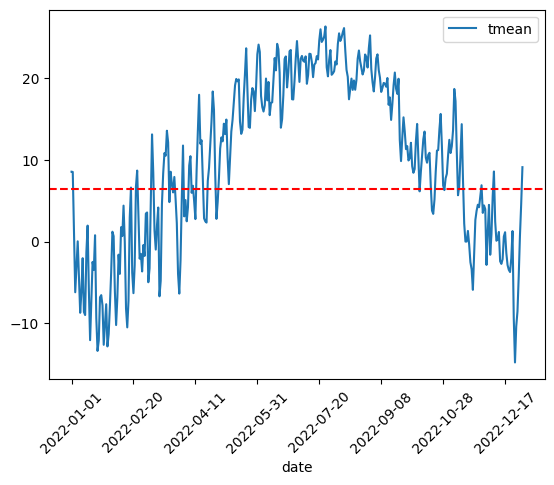

In [63]:
df[df['year'] == 2022].plot(x='date', y='tmean')
plt.axhline(y=6.5, color='red', linestyle='--')
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2019-11-12'),
  Text(0.0, 0, '2019-01-01'),
  Text(50.0, 0, '2019-02-20'),
  Text(100.0, 0, '2019-04-11'),
  Text(150.0, 0, '2019-05-31'),
  Text(200.0, 0, '2019-07-20'),
  Text(250.0, 0, '2019-09-08'),
  Text(300.0, 0, '2019-10-28'),
  Text(350.0, 0, '2019-12-17'),
  Text(400.0, 0, '')])

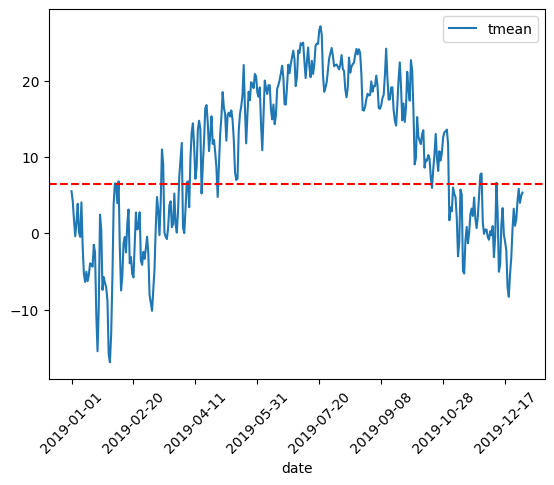

In [72]:
df[df['year'] == 2019].plot(x='date', y='tmean')
plt.axhline(y=6.5, color='red', linestyle='--')
plt.xticks(rotation=45)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2022-06-21'),
  Text(0.0, 0, '2022-05-01'),
  Text(10.0, 0, '2022-05-11'),
  Text(20.0, 0, '2022-05-21'),
  Text(30.0, 0, '2022-05-31'),
  Text(40.0, 0, '2022-06-10'),
  Text(50.0, 0, '2022-06-20'),
  Text(60.0, 0, '2022-06-30'),
  Text(70.0, 0, '')])

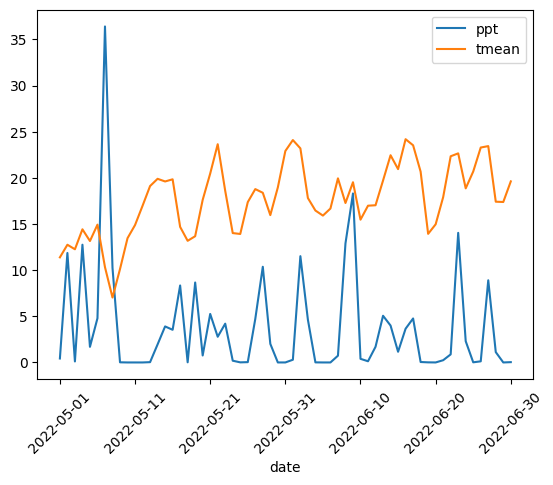

In [47]:
year = 2022
df_2023 = df[df['year'] == year]
df_2023.query('month == 5 or month == 6')[['date','ppt','tmean']].plot(x='date')
plt.xticks(rotation=45)

In [49]:
######### Analyze climate data #########

In [58]:
df.query('year == 2008 and month >= 9 or month <= 4 ')["ppt"].describe()

count    2046.000000
mean        2.793785
std         5.151132
min         0.000000
25%         0.021366
50%         0.478699
75%         2.911555
max        40.666088
Name: ppt, dtype: float64

In [60]:
df.query('year == 2023 and month >= 9 or month <= 4 ')["ppt"].describe()

count    2046.000000
mean        2.780722
std         5.180122
min         0.000000
25%         0.019991
50%         0.463392
75%         2.881092
max        40.666088
Name: ppt, dtype: float64

ValueError: time data '110' does not match format '%Y%j'

In [105]:
################# analysis of spring data #################

In [106]:
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [108]:
df1 = pd.DataFrame(years, columns=['year'])

In [121]:
def getTmeanDays(year):
    df_temp = df.query('year == @year')["tmean"].tolist()
    temps = [temp for temp in df_temp if temp >= 13.9]
    return len(temps)


def getPptDays(year):
    df_temp = df.query('year == @year')["ppt"].tolist()
    temps = [temp for temp in df_temp if temp >= 5]
    return len(temps)


In [122]:
df1['tmean_days'] = df1.apply(lambda x: getTmeanDays(x['year']), axis=1)
df1['ppt_days'] = df1.apply(lambda x: getPptDays(x['year']), axis=1)

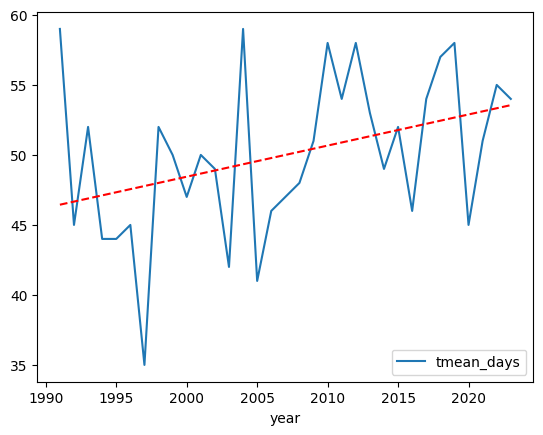

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial regression line
coefficients = np.polyfit(df1['year'], df1['tmean_days'], 1)
trend_line = np.polyval(coefficients, df1['year'])

# Plot the data and trend line
df1.plot(x='year', y='tmean_days')
plt.plot(df1['year'], trend_line, color='red', linestyle='--')
plt.show()


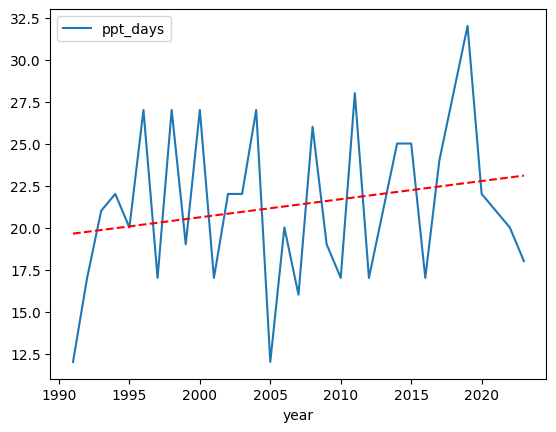

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a polynomial regression line
coefficients = np.polyfit(df1['year'], df1['ppt_days'], 1)
trend_line = np.polyval(coefficients, df1['year'])

# Plot the data and trend line
df1.plot(x='year', y='ppt_days')
plt.plot(df1['year'], trend_line, color='red', linestyle='--')
plt.show()
